In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np
import csv

In [2]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos_withregions.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

In [3]:
regns = set(list(waloc['Region']))

In [4]:
regn_pop = {}
for i in regns:
    wa_regn = waloc.loc[waloc['Region'] == i]
    pop = sum(list(wa_regn['Population']))
    regn_pop[i] = pop

In [5]:
regn_pop = {k: v for k, v in sorted(regn_pop.items(), key=lambda item: item[1], reverse = True)}

<BarContainer object of 10 artists>

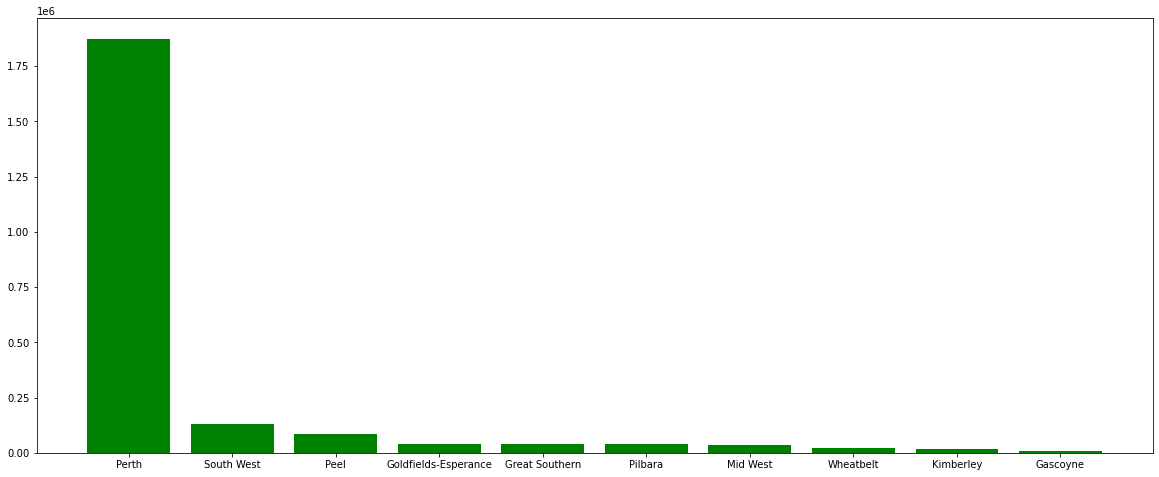

In [6]:
plt.figure(figsize = (20,8))
plt.bar(regn_pop.keys(), regn_pop.values(), color='g')

In [24]:
for i in regn_pop:
    print(i, regn_pop[i])

Perth 1874578
South West 130200
Peel 83210
Goldfields-Esperance 42085
Great Southern 40406
Pilbara 40110
Mid West 36113
Wheatbelt 20366
Kimberley 16671
Gascoyne 6912


In [7]:
(1874578 + 130200 + 83210)/sum(regn_pop.values())

0.9115260246977824